## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_russia = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_russia.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Russia


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


### Random Slice of Data
<hr>

In [3]:
df_rus =df_russia.drop(columns={'Maximum Temperature','Minimum Temperature'})

In [4]:
df_rus.head()

,Name,Date time,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [5]:
df_russia.shape

(18019, 15)

In [6]:
#printing missing data sum
df_russia.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              4957
Heat Index             17141
Precipitation              0
Snow Depth             12669
Wind Speed                 0
Wind Gust              17186
Visibility                34
Cloud Cover                2
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

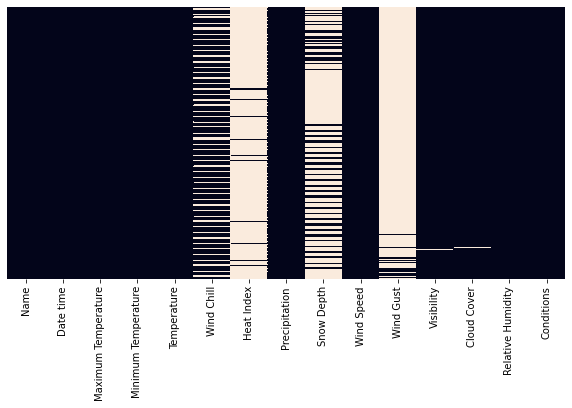

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_russia.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [8]:
df_russia.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [9]:
df_russia.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18014,russia,10/30/2020,42.1,36.0,39.6,0.0,6.7,6.2,73.0,81.37,Partially cloudy
18015,russia,10/31/2020,46.4,39.8,43.0,0.0,10.4,5.9,94.4,83.85,Overcast
18016,russia,11/01/2020,44.0,39.1,41.4,0.0,15.9,5.7,93.4,86.20,Overcast
18017,russia,11/02/2020,43.9,39.1,41.7,0.0,11.1,3.0,99.8,97.14,Overcast
18018,russia,11/03/2020,46.3,42.0,43.9,0.0,9.6,3.4,98.0,95.67,Overcast


In [10]:
#Mean Imputing for visibility
df_russia['Visibility'].fillna(df_russia['Visibility'].mean(), inplace = True)
df_russia['Cloud Cover'].fillna(df_russia['Cloud Cover'].mean(), inplace = True)
print(df_russia.isnull().sum())

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [11]:
#minimum value for temperature
df_russia['Temperature'].min()

-32.2

In [12]:
#maximum value for temperature
df_russia['Temperature'].max()

86.4

In [13]:
#minimim value for temperature
df_russia['Precipitation'].min()

0.0

In [14]:
#maximum value for precipitation
df_russia['Precipitation'].max()

37.92

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [15]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_russia.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_russia['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [16]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.0,13.9,6.2,48.3,84.54
1,0.0,18.3,3.1,87.5,89.14
2,0.0,18.3,3.7,92.5,91.09
3,0.0,16.1,3.7,97.5,89.49
4,0.0,16.1,2.7,100.0,92.43


In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [18]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_russia.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_russia['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

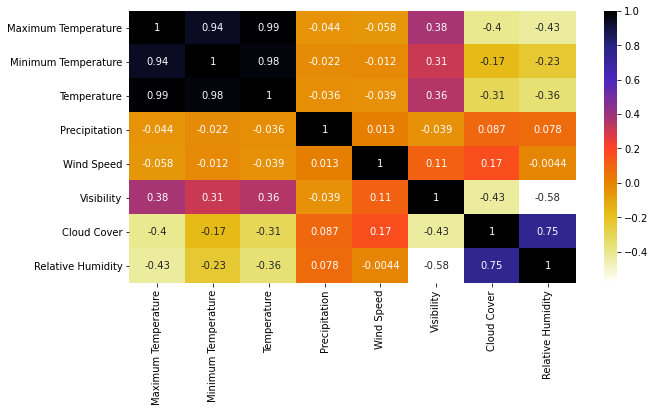

In [20]:
plt.figure(figsize=(10,5))
c= df_russia.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is slightly correlated with Visibility and has a slight negative correlation with Relative Humidity, Cloud Cover and other two features

For `Precipitation`, It is not not correlated with feature and these are negligible values

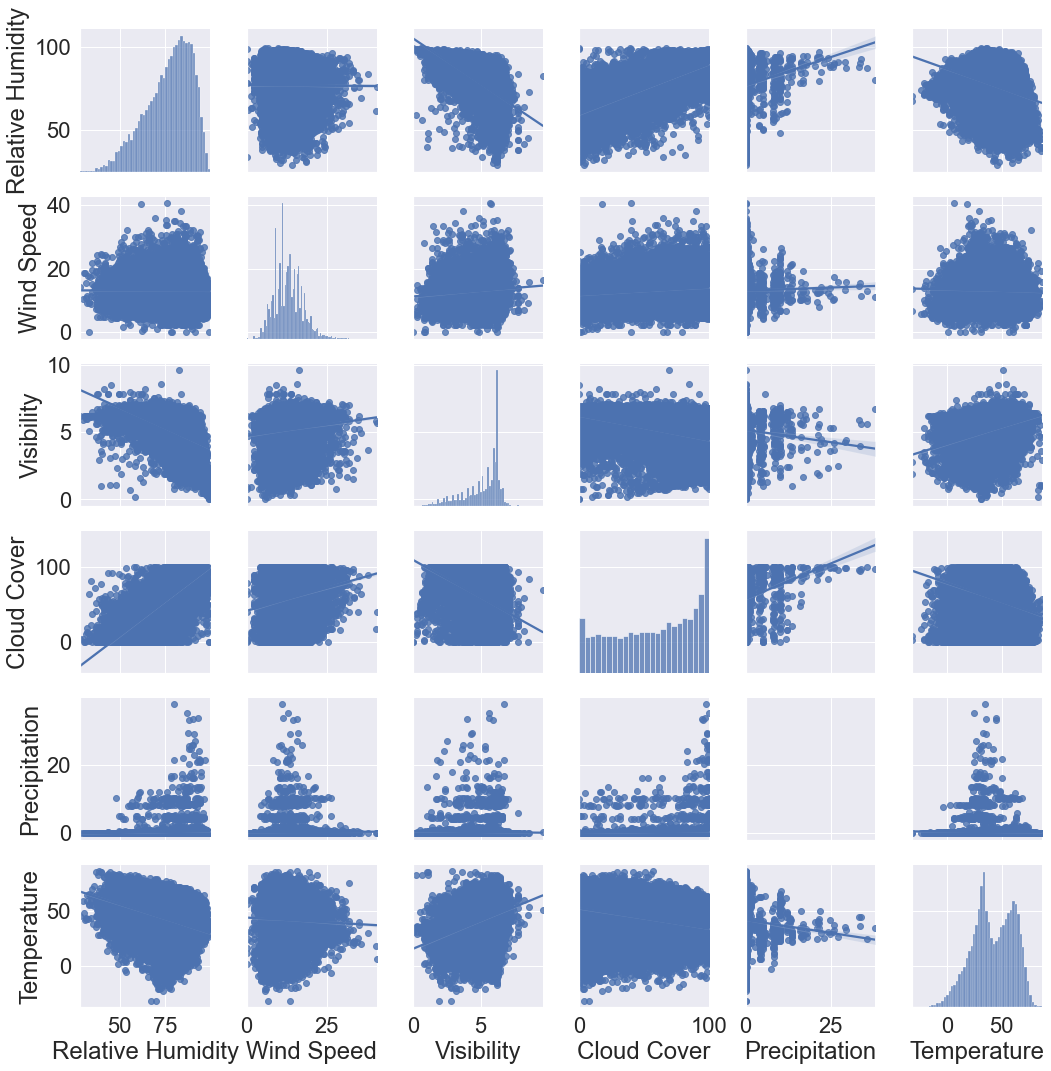

In [55]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_russia[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship.With respect to other features there is no obvious linear relation

For Precipitation, we can see majority of values are not correlated in any way. It lies in the range of 0-1 for many feature values.There is no obvious relation between any features and precipitation. 

#### 3.3 Using Feature Transformation for conditions

In [21]:
df_russia['Conditions'] = df_russia['Conditions'].astype('category')
df_russia_conditions = pd.get_dummies(df_russia['Conditions'])
df_russia  = pd.concat([df_russia,df_russia_conditions],axis=1)
df_russia.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy,0,0,1,0,0,0,0,0,0
1,russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast,0,1,0,0,0,0,0,0,0
2,russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast,0,1,0,0,0,0,0,0,0
3,russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast,0,1,0,0,0,0,0,0,0
4,russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast,0,1,0,0,0,0,0,0,0


In [22]:
df_russia.to_csv("russia_cleaned.csv")

## Regression

(array([   8.,   63.,  382., 1161., 2389., 4324., 2926., 3843., 2695.,
         228.]),
 array([-32.2 , -20.34,  -8.48,   3.38,  15.24,  27.1 ,  38.96,  50.82,
         62.68,  74.54,  86.4 ]),
 <BarContainer object of 10 artists>)

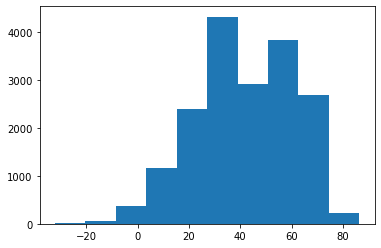

In [23]:
plt.hist(df_russia['Temperature'])

(array([1.7737e+04, 1.1200e+02, 1.0300e+02, 2.8000e+01, 1.4000e+01,
        1.0000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.   ,  3.792,  7.584, 11.376, 15.168, 18.96 , 22.752, 26.544,
        30.336, 34.128, 37.92 ]),
 <BarContainer object of 10 artists>)

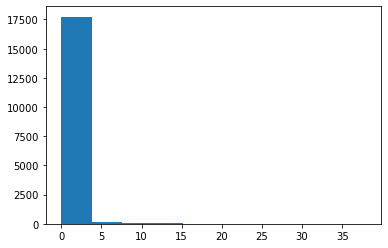

In [24]:
plt.hist(df_russia['Precipitation'])

In [25]:
df_russia['Date time']= pd.to_datetime(df_russia['Date time'])
df_russia['Date time'].dtype

dtype('<M8[ns]')

#### Segregating variables: Independent and Dependent Variables for Temperature

In [26]:
#Considering Visibilty, Cloud Cover and Humidity
X_temp=df_russia.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time','Wind Speed'],axis=1)
Y_temp=df_russia.Temperature
X_Date = df_russia[['Date time']]

#### Importing the train test split function for Temperature

In [27]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp,test_size=0.22,shuffle=False)
train_X_Date,test_X_Date,train_y_temp,test_y_temp = train_test_split(X_Date,Y_temp,test_size=0.22,shuffle=False)

In [28]:
train_X_temp.head()

,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,6.2,48.3,84.54,0,0,1,0,0,0,0,0,0
1,3.1,87.5,89.14,0,1,0,0,0,0,0,0,0
2,3.7,92.5,91.09,0,1,0,0,0,0,0,0,0
3,3.7,97.5,89.49,0,1,0,0,0,0,0,0,0
4,2.7,100.0,92.43,0,1,0,0,0,0,0,0,0


In [29]:
train_y_temp.head()

0     4.7
1    10.4
2    25.5
3    22.7
4    29.5
Name: Temperature, dtype: float64

In [30]:
test_X_Date.reset_index(inplace=True)
test_X_Date.drop(columns=['index'],inplace=True)
test_X_Date.head()

,Date time
0,2009-12-27
1,2009-12-28
2,2009-12-29
3,2009-12-30
4,2009-12-31


In [31]:
#getting the shape for training data
train_X_temp.shape

(14054, 12)

In [32]:
train_y_temp.shape

(14054,)

In [33]:
#getting the shape for test data
test_X_temp.shape

(3965, 12)

### 1. Implementing Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score 
import math

In [157]:
lr = LR(normalize=True)
kfold = KFold(n_splits=10)#using KFold cross validation
mse_scores = -np.round(cross_val_score(lr,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))
lr_cross_val_score = np.mean(rmse_scores)

[16.3707055437449, 14.866068747318506, 14.106735979665885, 18.788294228055936, 18.24828759089466, 14.352700094407323, 12.68857754044952, 12.884098726725126, 13.341664064126334, 11.832159566199232]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.747929208158743


Text(0.5, 1.0, 'Multi Linear Regression')

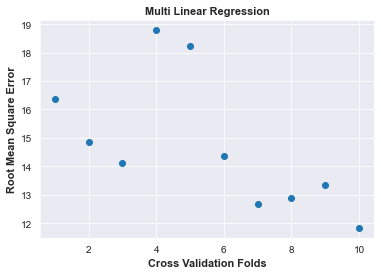

In [158]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds",fontweight='bold',fontsize=11)
plt.ylabel("Root Mean Square Error",fontweight='bold',fontsize=11)
plt.title("Multi Linear Regression",fontweight='bold',fontsize=11)

In [159]:
# Predicting over the Train Set and calculating error
lr.fit(train_X_temp,train_y_temp)
train_predict = lr.predict(train_X_temp)
linear_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 14.745638537884357


In [160]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
linear_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )
linear_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Linear regression',linear_r2_score)

Test Root Mean Squared Error 12.476409602646314
R2 Square Error for Linear regression 0.5736100552172687


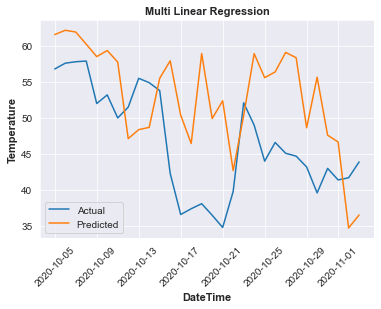

In [161]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.xlabel("DateTime",fontweight='bold',fontsize=11)
plt.ylabel("Temperature",fontweight='bold',fontsize=11)
plt.title("Multi Linear Regression",fontweight='bold',fontsize=11)
plt.legend()

### Knn Algorithm

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
x_scaled= MinMaxScaler()
train_X_temp[['Cloud Cover','Relative Humidity','Visibility']] = x_scaled.fit_transform(train_X_temp[['Cloud Cover','Relative Humidity','Visibility']])

x_test_scaled= MinMaxScaler()
test_X_temp[['Cloud Cover','Relative Humidity','Visibility']]=x_test_scaled.fit_transform(test_X_temp[['Cloud Cover','Relative Humidity','Visibility']])

In [163]:
from sklearn import neighbors
n_neighbors=18 #came up with 18 after hyper-paramter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,leaf_size=3,n_jobs=-1,algorithm='ball_tree')
mse_scores = -np.round(cross_val_score(knn,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))
knn_cross_val_score = np.mean(rmse_scores)

[15.716233645501712, 14.352700094407323, 13.45362404707371, 17.60681686165901, 17.146428199482248, 14.317821063276353, 11.832159566199232, 11.958260743101398, 12.449899597988733, 10.908712114635714]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:13.974265593332541


Text(0.5, 1.0, 'KNN Regression')

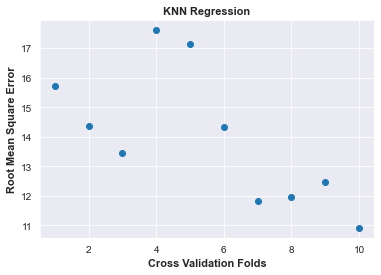

In [164]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds",fontweight='bold',fontsize=11)
plt.ylabel("Root Mean Square Error",fontweight='bold',fontsize=11)
plt.title("KNN Regression",fontweight='bold',fontsize=11)

In [165]:
# Predicting over the Train Set and calculating error
knn.fit(train_X_temp,train_y_temp)
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error',math.sqrt(knn_train_error))

Training Root Mean Squared Error 13.128914974913148


In [166]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 12.042377376554892
R2 Square Error for KNN regression 0.6027607333829537


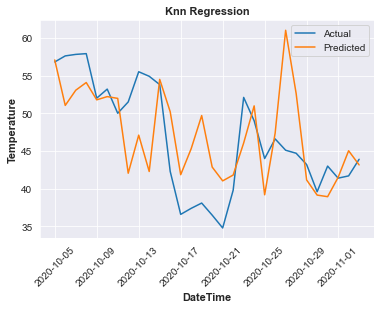

In [167]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.xlabel("DateTime",fontweight='bold',fontsize=11)
plt.ylabel("Temperature",fontweight='bold',fontsize=11)
plt.title("Knn Regression",fontweight='bold',fontsize=11)
plt.legend()

### Residual plot in KNN

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

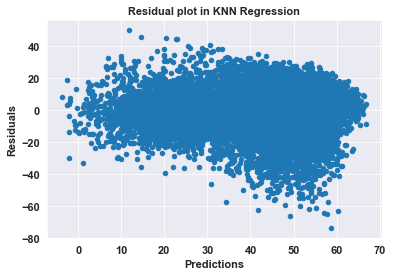

In [168]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions",fontweight='bold',fontsize=11)
plt.ylabel("Residuals",fontweight='bold',fontsize=11)
plt.title("Residual plot in KNN Regression",fontweight='bold',fontsize=11)
plt.xticks(fontweight='bold',fontsize=11)
plt.yticks(fontweight='bold',fontsize=11)

### XGBoost Regressor

In [169]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
xgb = XGBRegressor()
mse_scores = -np.round(cross_val_score(xgb,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))
xgb_cross_val_score = np.mean(rmse_scores)

[14:16:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

Text(0, 0.5, 'Root Mean Square Error')

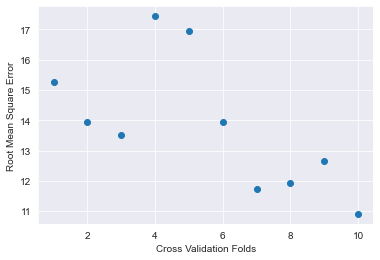

In [170]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [171]:
# Predicting over the Train Set and calculating error
xgb.fit(train_X_temp,train_y_temp)
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

[14:16:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Root Mean Squared Error 13.497414492985996


In [172]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 12.317403592884055
R2 Square Error for Gradient Boosting regression 0.5844090807964312


### Residual plot in Gradient Boosting

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

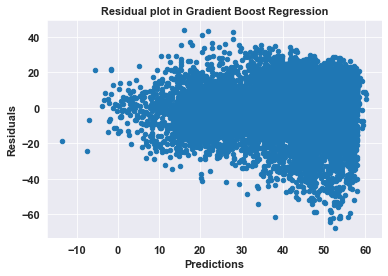

In [173]:
preds = pd.DataFrame({"preds":xgb.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions",fontsize=11,fontweight='bold')
plt.ylabel("Residuals",fontsize=11,fontweight='bold')
plt.title("Residual plot in Gradient Boost Regression",fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=11)
plt.yticks(fontweight='bold',fontsize=11)

### Decision Tree Regressor

In [174]:
from sklearn import tree
#Paraemeters passed here are tuned using Hyper-parameter tuning
dec = tree.DecisionTreeRegressor(max_features="auto",min_samples_leaf=8,min_samples_split=15,max_depth=7)
mse_scores = -np.round(cross_val_score(dec,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))
dec_cross_val_score = np.mean(rmse_scores)

[15.84297951775486, 14.352700094407323, 13.892443989449804, 18.05547008526779, 17.4928556845359, 14.45683229480096, 12.041594578792296, 12.288205727444508, 13.152946437965905, 11.269427669584644]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.2845456080004


Text(0.5, 1.0, 'Decision Tree Regression')

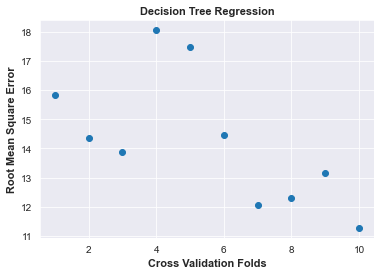

In [175]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds",fontweight='bold',fontsize=11)
plt.ylabel("Root Mean Square Error",fontweight='bold',fontsize=11)
plt.title("Decision Tree Regression",fontweight='bold',fontsize=11)

In [176]:
# Predicting over the Train Set and calculating error
dec.fit(train_X_temp,train_y_temp)
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 13.758149268897837


In [177]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 12.327463779107644
R2 Square Error for Decision Tree regression 0.5837299393875304


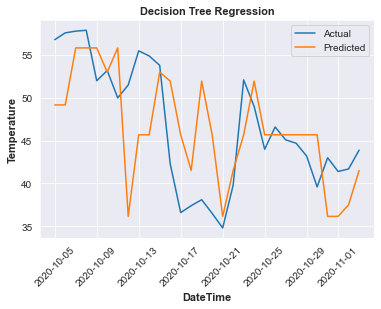

In [178]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.xlabel("DateTime",fontweight='bold',fontsize=11)
plt.ylabel("Temperature",fontweight='bold',fontsize=11)
plt.title("Decision Tree Regression",fontweight='bold',fontsize=11)
plt.legend()

### Residual Plot in Decision Tree Regressor

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

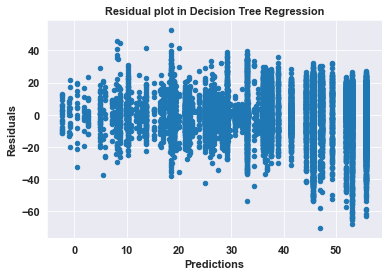

In [179]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.xlabel("Predictions",fontsize=11,fontweight='bold')
plt.ylabel("Residuals",fontsize=11,fontweight='bold')
plt.title("Residual plot in Decision Tree Regression",fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=11)
plt.yticks(fontweight='bold',fontsize=11)

###  Support Vector Regression for Temperature

#### Pre processing features

In [180]:
from sklearn.svm import SVR

model1=SVR(kernel="rbf",C=12) #Came up with parameters after parameter tuning
mse_scores = -np.round(cross_val_score(model1,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))
svm_cross_val_score = np.mean(rmse_scores)

[16.911534525287763, 14.7648230602334, 13.45362404707371, 18.973665961010276, 18.275666882497067, 14.142135623730951, 11.575836902790225, 11.575836902790225, 12.529964086141668, 10.723805294763608]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.292689328631889


Text(0.5, 1.0, 'SVM Regression')

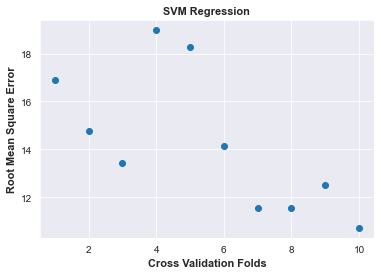

In [181]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds",fontweight='bold',fontsize=11)
plt.ylabel("Root Mean Square Error",fontweight='bold',fontsize=11)
plt.title("SVM Regression",fontweight='bold',fontsize=11)

In [182]:
# Predicting over the Train Set and calculating error
model1.fit(train_X_temp,train_y_temp)
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 14.282951884164262


In [183]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 11.742231681743146
R2 Square Error for SVM regression 0.6223156442950473


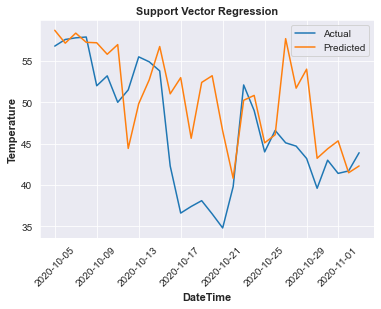

In [185]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.xlabel("DateTime",fontweight='bold',fontsize=11)
plt.ylabel("Temperature",fontweight='bold',fontsize=11)
plt.title("Support Vector Regression",fontweight='bold',fontsize=11)
plt.legend()

### Residual Plot for Support Vector Machine

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

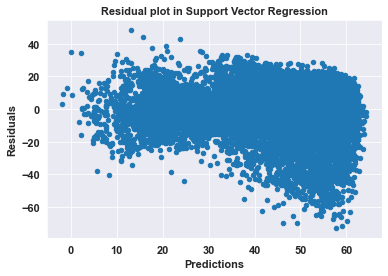

In [130]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.xlabel("Predictions",fontsize=11,fontweight='bold')
plt.ylabel("Residuals",fontsize=11,fontweight='bold')
plt.title("Residual plot in Support Vector Regression",fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=11)
plt.yticks(fontweight='bold',fontsize=11)

### Getting the Graph for all Models RMSE

In [360]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost Regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,14.745639,12.484001
K-Nearest,13.128915,12.042377
XGBoost Regressor,13.497414,12.317404
Decision Tree,13.758149,12.327464
SVM,14.282952,11.742232


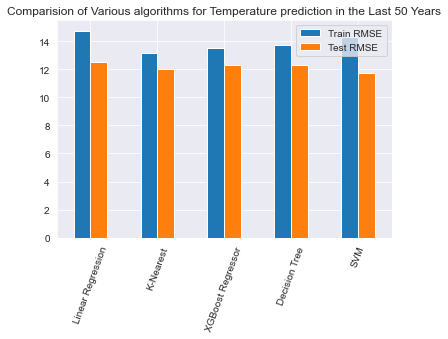

In [361]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Cross Validation Root Mean sqaure error Mean

In [70]:
cross_valid_score = [lr_cross_val_score,knn_cross_val_score,xgb_cross_val_score,dec_cross_val_score,svm_cross_val_score]

col = {'Cross_Validation_Scores':[i for i in cross_valid_score]}
models={'Linear Regression','K-Nearest','XGBoost','Decision Tree','SVM'}
df = pd.DataFrame(data=col,index=models)
df

,Cross_Validation_Scores
K-Nearest,14.747929
Decision Tree,13.974266
Linear Regression,13.824707
XGBoost,14.284546
SVM,14.292689


Text(0.5, 1.0, 'Cross Validation Root Mean Square Error Mean for Various Models')

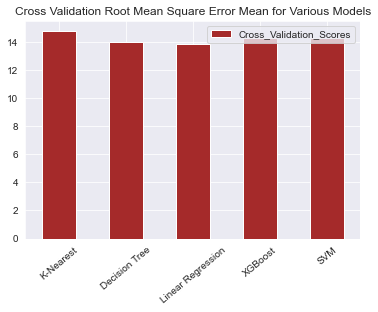

In [74]:
df.plot(kind='bar',color='brown')
plt.xticks(rotation=40)
plt.title("Cross Validation Root Mean Square Error Mean for Various Models")

### Getting the Graph for all Models Test R2 Square Error

In [435]:
test_r2_square_error=[linear_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square':[i for i in test_r2_square_error]}
models=['Linear Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square
Linear Regression,0.573091
K-Nearest,0.602761
Gradent Boost,0.584409
Decision Tree,0.583730
SVM,0.622316


Text(0.5, 1.0, 'R2 Square for Various Models')

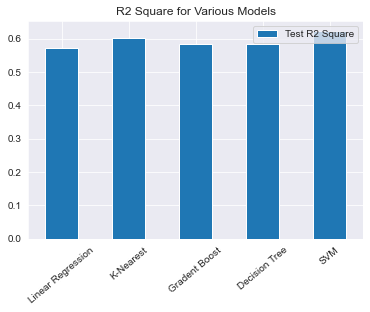

In [436]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [364]:
# Considering only cloud cover and relative Humidity
X_prec=df_russia.drop(columns=['Precipitation','Name','Date time','Maximum Temperature','Minimum Temperature','Temperature','Visibility',
                           'Wind Speed','Conditions'],axis=1)
Y_prec=df_russia.Precipitation

In [365]:
X_prec.head()

,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,48.3,84.54,0,0,1,0,0,0,0,0,0
1,87.5,89.14,0,1,0,0,0,0,0,0,0
2,92.5,91.09,0,1,0,0,0,0,0,0,0
3,97.5,89.49,0,1,0,0,0,0,0,0,0
4,100.0,92.43,0,1,0,0,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [411]:
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec,test_size=0.35,shuffle=False)

### Multi Linear Regression

In [412]:
lr = LR(normalize=True)
lr.fit(train_X_prec,train_y_prec)
y_predict=lr.predict(test_X_prec)

In [413]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_prec)
linear_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 0.9633969608616284


In [414]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_prec)
linear_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )

Test Root Mean Squared Error 1.9776870094140528


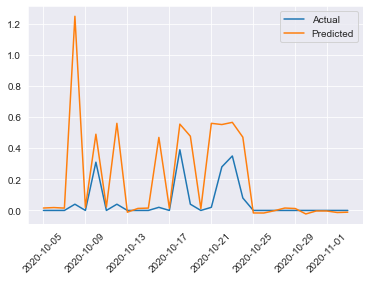

In [415]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Knn Algorithm

In [416]:
#Preprocessing features
x_scaled=StandardScaler()
train_X_prec[['Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Cloud Cover','Relative Humidity']])

In [417]:
n_neighbors=10 #came up with 10 after hyper-paremter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [418]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 0.9093327186760528


In [419]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 2.02659192344281


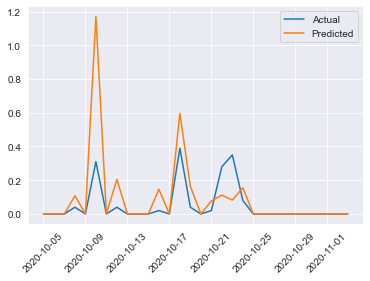

In [420]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Decision Tree Regressor

In [421]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [422]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 0.9782365526729966


In [423]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )

Test Root Mean Squared Error 1.9882303266315815


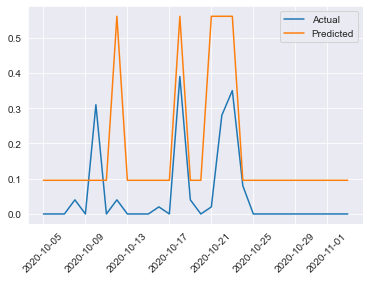

In [424]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Gradient Boosting Regressor

In [425]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[19:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [426]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 0.8921030538616956


In [427]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 1.9895610196349633


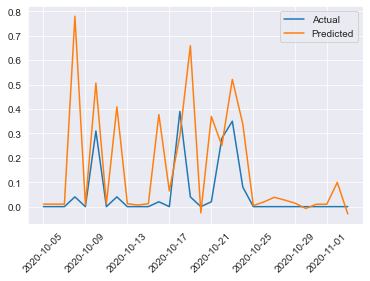

In [428]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Support Vector Regression for Precipitation

In [429]:
model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [430]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 0.9837400302113183


In [431]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error))

Test Root Mean Squared Error 2.0025246058517783


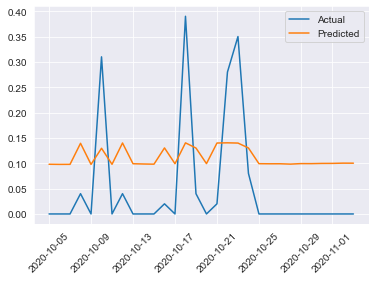

In [432]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Getting the Graph for all Models RMSE

In [433]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,0.963397,1.977687
K-Nearest,0.909333,2.026592
XGBoost regressor,0.892103,1.989561
Decision Tree,0.978237,1.988230
SVM,0.983740,2.002525


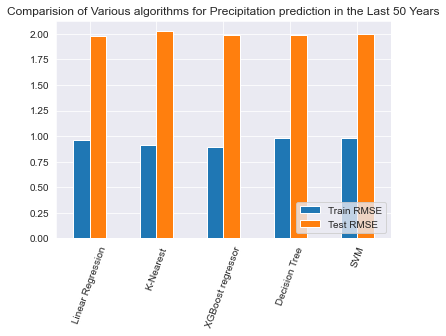

In [434]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.legend(loc='lower right')
plt.show()